# Projet : Deep Learning
*Par Arthur Couturier, Enzo Di Maria, José Colin, Rémi Bonrepaux & Yassir El Bsita*

<b>Lien vers la doc :</b> https://keras.io/api/

In [1]:
import sys
from random import randint
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<b> Accès à la base de données ainsi qu'aux scripts </b>
1. <b>Version distante :</b> Vous utilisez Google Colab. Dans ce cas vous devrez cloner le dépôt GitHub en exécutant la portion (1) du code ci-dessous.
2. <b>Version locale :</b> Vous utilisez Visual Studio Code ou Jupyter Notebook. Dès lors, vous devrez simplement exécuter la portion (2) du code.

In [2]:
# Version distante (1)
#!git clone https://github.com/EnzoN7/Image-classification.git
#path = "./Image-classification/images/"
#sys.path.insert(1, "./Image-classification/scripts/")
#sys.path.insert(1, "./Image-classification/models/")

# Version locale (2)
path = "./images/"
sys.path.insert(1, "./scripts")
sys.path.insert(1, "./models")

# (1) et (2)
from LoadData import load_data
from Plots import plot_training_analysis, plot_random_images
from Tests import test_data, print_false_values
from BasicConvolutionalNetwork import BasicConvolutionalNetwork
from VGG16Network import VGG16Network
from InceptionV3Network import InceptionV3Network

<b> Stockage des fichiers au sein de tenseurs </b>

In [3]:
IMAGE_SIZE = 100
labels = ['Apples-Braeburn', 'Apples-Granny-Smith', 'Apricots',
          'Clementines','Corns', 'Cucumber-Ripes',
          'Green-Peppers', 'Kiwis', 'Lemons',
          'Limes', 'Mangos', 'Onions',
          'Oranges', 'Peaches', 'Pears',
          'Pineapples', 'Red-Peppers', 'Strawberries',
          'Tomatoes', 'Watermelons']

x_train, y_train = load_data(path, labels, _imagesize=IMAGE_SIZE)
x_val, y_val = load_data(path, labels, _dataset='validation', _imagesize=IMAGE_SIZE)
x_test, y_test = load_data(path, labels, _dataset='test', _imagesize=IMAGE_SIZE)

x_train.shape = (7050, 100, 100, 3)
y_train.shape = (7050, 1)


  0% (0 of 20) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  5% (1 of 20) |#                        | Elapsed Time: 0:00:00 ETA:   0:00:04
 10% (2 of 20) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:04
 15% (3 of 20) |###                      | Elapsed Time: 0:00:00 ETA:   0:00:04
 20% (4 of 20) |#####                    | Elapsed Time: 0:00:00 ETA:   0:00:03
 25% (5 of 20) |######                   | Elapsed Time: 0:00:01 ETA:   0:00:03
 30% (6 of 20) |#######                  | Elapsed Time: 0:00:01 ETA:   0:00:03
 35% (7 of 20) |########                 | Elapsed Time: 0:00:01 ETA:   0:00:03
 40% (8 of 20) |##########               | Elapsed Time: 0:00:01 ETA:   0:00:02
 45% (9 of 20) |###########              | Elapsed Time: 0:00:02 ETA:   0:00:02
 50% (10 of 20) |############            | Elapsed Time: 0:00:02 ETA:   0:00:02
 55% (11 of 20) |#############           | Elapsed Time: 0:00:02 ETA:   0:00:02
 60% (12 of 20) |##############         

x_validation.shape = (1478, 100, 100, 3)
y_validation.shape = (1478, 1)


  5% (1 of 20) |#                        | Elapsed Time: 0:00:00 ETA:   0:00:02
 10% (2 of 20) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:02
 15% (3 of 20) |###                      | Elapsed Time: 0:00:00 ETA:   0:00:02
 20% (4 of 20) |#####                    | Elapsed Time: 0:00:00 ETA:   0:00:02
 25% (5 of 20) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:02
 30% (6 of 20) |#######                  | Elapsed Time: 0:00:00 ETA:   0:00:01
 35% (7 of 20) |########                 | Elapsed Time: 0:00:00 ETA:   0:00:01
 40% (8 of 20) |##########               | Elapsed Time: 0:00:01 ETA:   0:00:01
 45% (9 of 20) |###########              | Elapsed Time: 0:00:01 ETA:   0:00:01
 50% (10 of 20) |############            | Elapsed Time: 0:00:01 ETA:   0:00:01
 55% (11 of 20) |#############           | Elapsed Time: 0:00:01 ETA:   0:00:01
 60% (12 of 20) |##############          | Elapsed Time: 0:00:01 ETA:   0:00:01
 65% (13 of 20) |###############        

x_test.shape = (1488, 100, 100, 3)
y_test.shape = (1488, 1)


  5% (1 of 20) |#                        | Elapsed Time: 0:00:00 ETA:   0:00:02
 10% (2 of 20) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:02
 15% (3 of 20) |###                      | Elapsed Time: 0:00:00 ETA:   0:00:02
 20% (4 of 20) |#####                    | Elapsed Time: 0:00:00 ETA:   0:00:02
 25% (5 of 20) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:02
 30% (6 of 20) |#######                  | Elapsed Time: 0:00:00 ETA:   0:00:01
 35% (7 of 20) |########                 | Elapsed Time: 0:00:00 ETA:   0:00:01
 40% (8 of 20) |##########               | Elapsed Time: 0:00:01 ETA:   0:00:01
 45% (9 of 20) |###########              | Elapsed Time: 0:00:01 ETA:   0:00:01
 50% (10 of 20) |############            | Elapsed Time: 0:00:01 ETA:   0:00:01
 55% (11 of 20) |#############           | Elapsed Time: 0:00:01 ETA:   0:00:01
 60% (12 of 20) |##############          | Elapsed Time: 0:00:01 ETA:   0:00:01
 65% (13 of 20) |###############        

<b> Affichage d'une sélection d'images aléatoire pour vérifier que l'importation s'est bien déroulée </b>

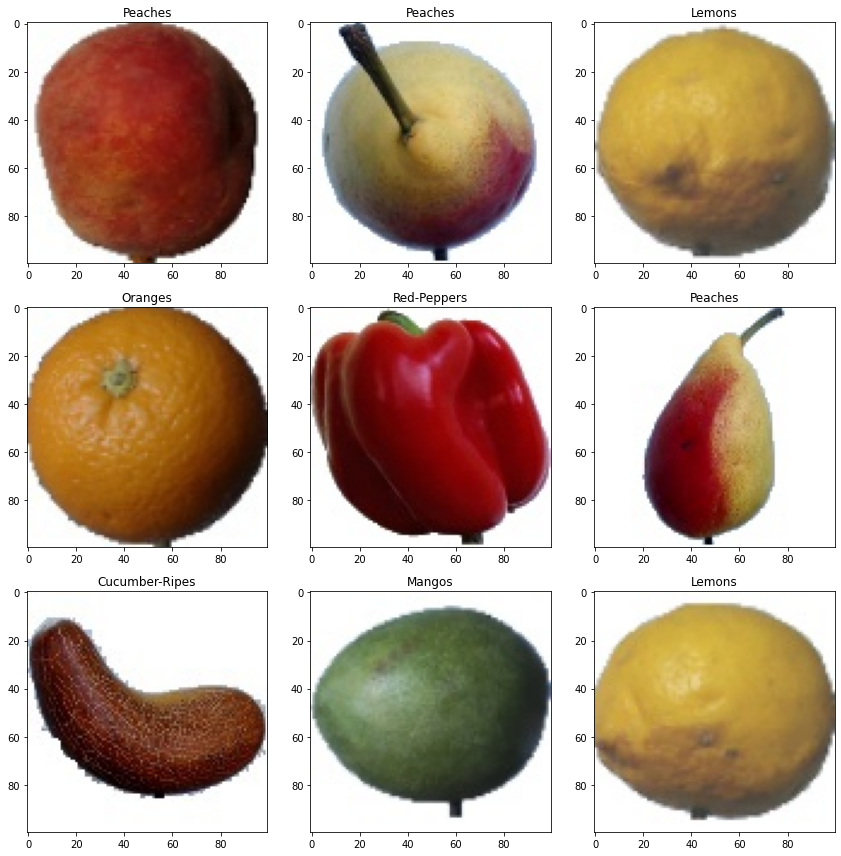

In [4]:
plot_random_images(x_train, y_train, labels)

<b>Lancement de l'entraînement</b>

In [5]:
METRICS = 'sparse_categorical_accuracy'

# Objet permettant d'augmenter davantage la taille de la base de données.
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow(x_train, y_train)
val_generator = train_datagen.flow(x_val, y_val)

model = BasicConvolutionalNetwork(len(labels), IMAGE_SIZE)

model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=[METRICS])

history = model.fit(train_generator, 
                    validation_data=val_generator,
                    epochs=10)

Model: "basic_convolutional_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  896       
                                                                 
 conv2d_1 (Conv2D)           multiple                  18496     
                                                                 
 conv2d_2 (Conv2D)           multiple                  54238     
                                                                 
 conv2d_3 (Conv2D)           multiple                  108416    
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 flatten (Flatten)           multiple                  0         
                                       

<b>Analyse post-entraînement</b>
- <b>Prédiction de la classe</b> éventuelle d'une image test prise aléatoirement dans la base de donnée.
- Graphique montrant <b>l'évolution des métriques</b> au cours de l'entraînement sur les ensembles d'apprentissage et de validation.
- <b>Evalutation du modèle</b> dans sa globalité.
- (<b>Affichage des prédictions râtées</b>.)

PREDICTIONS sur la donnée n°869/1487
     Apples-Braeburn -> 0.00%
     Apples-Granny-Smith -> 0.00%
     Apricots -> 0.17%
     Clementines -> 0.00%
     Corns -> 0.00%
     Cucumber-Ripes -> 0.00%
     Green-Peppers -> 0.00%
     Kiwis -> 0.00%
     Lemons -> 0.00%
     Limes -> 0.00%
     Mangos -> 0.00%
     Onions -> 0.00%
     Oranges -> 99.83%
     Peaches -> 0.00%
     Pears -> 0.00%
     Pineapples -> 0.00%
     Red-Peppers -> 0.00%
     Strawberries -> 0.00%
     Tomatoes -> 0.00%
     Watermelons -> 0.00%

RESULTAT : Oranges / 99.83%


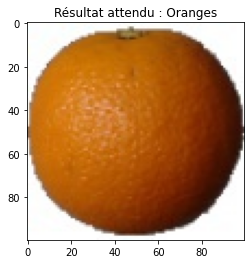

In [6]:
idx = randint(0, len(x_test) - 1)
test_data(model, labels, idx, x_test, y_test)

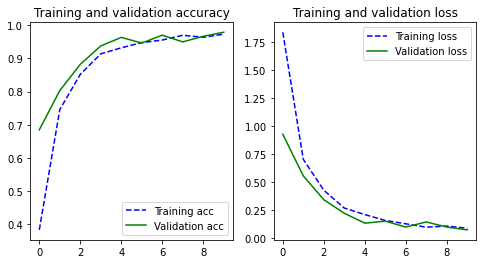

In [7]:
plot_training_analysis(history, METRICS)

In [8]:
print("EVALUATION DU MODELE " + model.name)
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=10)
print("Loss     : {0:.2f}".format(loss_and_metrics[0]))
print("Accuracy : {0:.2f}%".format(loss_and_metrics[1] * 100))

EVALUATION DU MODELE basic_convolutional_network
149/149 [==============================] - 2s 13ms/step - loss: 2.4647 - sparse_categorical_accuracy: 0.9301
Loss     : 2.46
Accuracy : 93.01%


In [9]:
#print_false_values(model, labels, x_test, y_test)